Iris Flower Classification Project

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
# Loading the iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Convert to DataFrame for easy visualization
df = pd.DataFrame(X, columns=iris.feature_names)
df['species'] = iris.target
df['species'] = df['species'].map({0: 'Setosa', 1: 'Versicolor', 2: 'Virginica'})


In [3]:
# Explore the data
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  Setosa  
1  Setosa  
2  Setosa  
3  Setosa  
4  Setosa  


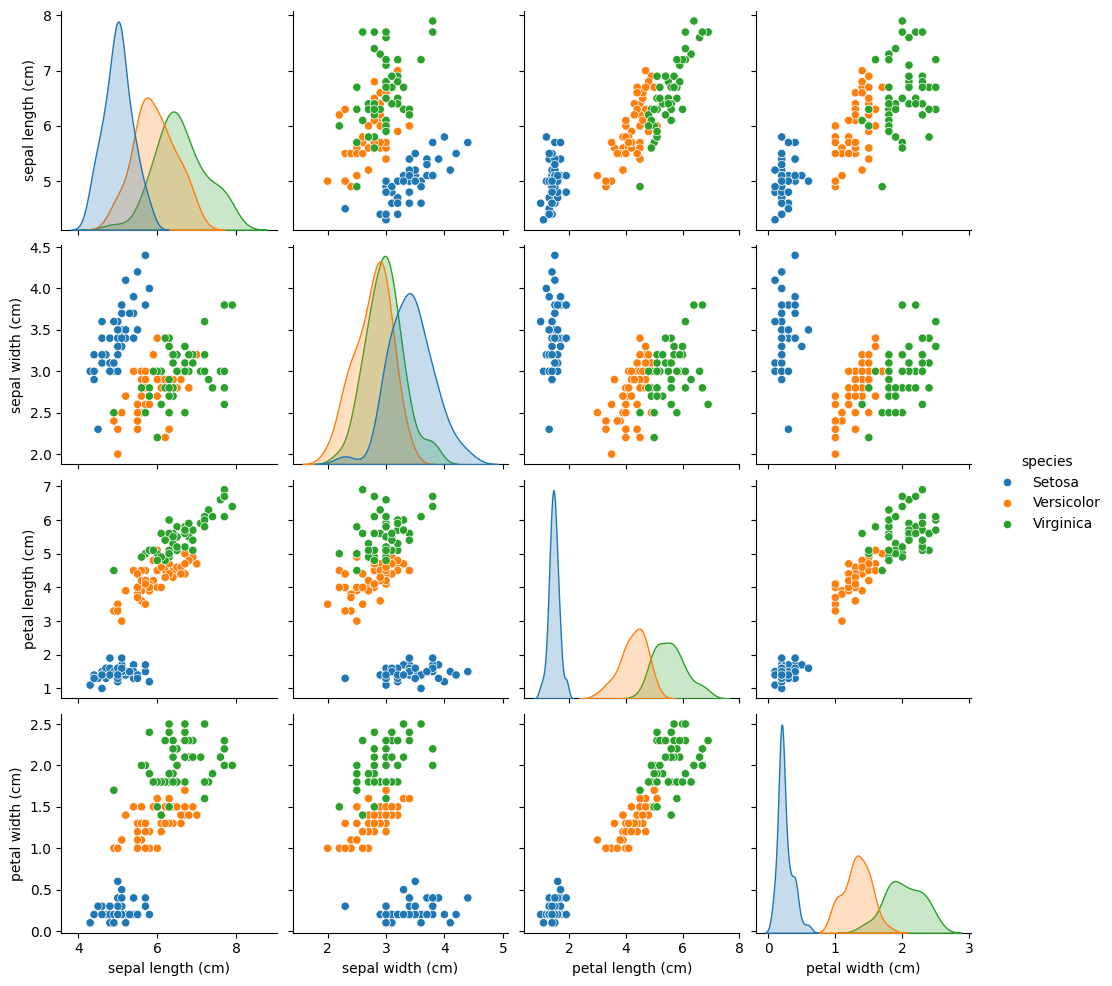

In [4]:
# Pairplot to see the separation visually
sns.pairplot(df, hue='species')
plt.show()

In [5]:
# Check balance
print(df['species'].value_counts())

species
Setosa        50
Versicolor    50
Virginica     50
Name: count, dtype: int64


In [7]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=y)

In [8]:
# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
# Train a KNN Classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

Accuracy: 0.9333333333333333

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.83      1.00      0.91        10
           2       1.00      0.80      0.89        10

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



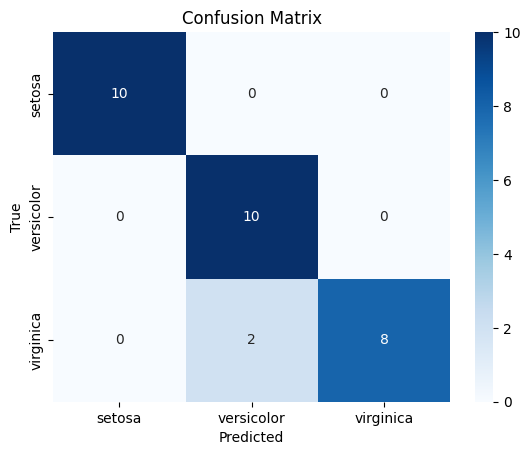

In [11]:
# Evaluate the model
y_pred = knn.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=iris.target_names,
            yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [12]:
# Real-time Prediction Example
# Example new flower data
new_data = np.array([[5.1, 3.5, 1.4, 0.2]])  # Example dimensions

# Scale it
new_data_scaled = scaler.transform(new_data)

# Predict
prediction = knn.predict(new_data_scaled)
predicted_species = iris.target_names[prediction[0]]

print("Predicted Species:", predicted_species)

Predicted Species: setosa


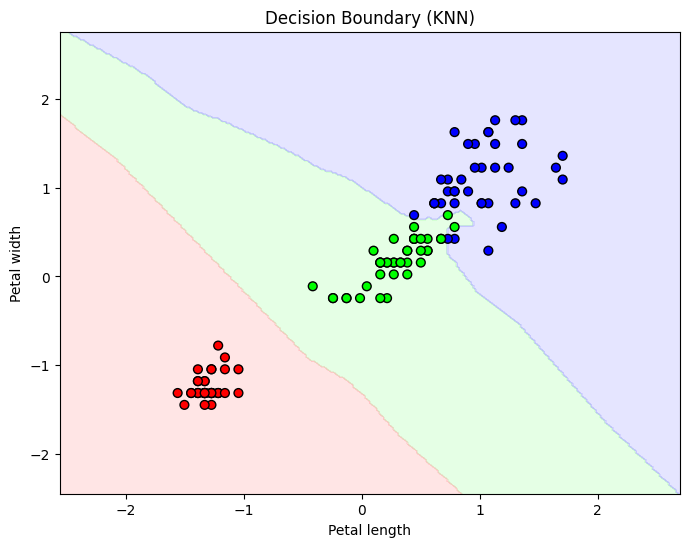

In [13]:
# Optional: Decision boundary plot (2D example)
# For illustration, using only two features (petal length & petal width)
from matplotlib.colors import ListedColormap

X_simple = X[:, 2:4]
X_train_simple, X_test_simple, y_train_simple, y_test_simple = train_test_split(X_simple, y, test_size=0.2, random_state=42)

scaler_simple = StandardScaler()
X_train_simple = scaler_simple.fit_transform(X_train_simple)
X_test_simple = scaler_simple.transform(X_test_simple)

knn_simple = KNeighborsClassifier(n_neighbors=3)
knn_simple.fit(X_train_simple, y_train_simple)

# Create mesh grid
x_min, x_max = X_train_simple[:, 0].min() - 1, X_train_simple[:, 0].max() + 1
y_min, y_max = X_train_simple[:, 1].min() - 1, X_train_simple[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
Z = knn_simple.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_light)
plt.scatter(X_train_simple[:, 0], X_train_simple[:, 1], c=y_train_simple, cmap=cmap_bold, edgecolor='k', s=40)
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.title('Decision Boundary (KNN)')
plt.show()